# COVID-19 Mortality Prediction with Support Vector Regression Model

### Dependencies importing

In [5]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2
### TBE -> To Be Engineering...
# covid_ts_pred package
from covid_ts_pred.c_eng.engineering import *

project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/.env
project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/covid_ts_pred/.env


In [6]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
 #sklearn preproc

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

import pickle

In [8]:
### TBE done!
country='Spain'

In [9]:
### TBE done!
data_index = pd.read_csv(get_csv_out_path(f'index_{country}.csv'))

In [10]:
data_index.head()

,date,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,2020-03-03,0.025912,0.022908,0.0,165.0,45.0,1.0,1.0,0.021637,0.0,0.0,0.0,0.0
1,2020-03-04,0.025912,0.022908,0.0,222.0,57.0,2.0,1.0,0.021637,0.0,0.0,0.0,0.0
2,2020-03-05,0.025912,0.022908,0.0,259.0,37.0,3.0,1.0,0.021637,0.0,0.0,0.0,0.0
3,2020-03-06,0.025912,0.022908,0.0,400.0,141.0,5.0,2.0,0.021637,0.0,0.0,0.0,0.0
4,2020-03-07,0.025912,0.022908,0.0,500.0,100.0,10.0,5.0,0.021637,0.0,0.0,0.0,0.0


In [11]:
data_index=data_index.set_index('date')

In [12]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,0.070062,0.094498,0.000000,5232.0,2955.0,133.0,78.0,0.058512,0.0,0.0,...,55.0,54.0,35.0,28.0,17.0,10.0,5.0,3.0,2.0,1.0
2020-03-14,0.097142,0.138417,0.000000,6391.0,1159.0,195.0,62.0,0.081131,0.0,0.0,...,133.0,55.0,54.0,35.0,28.0,17.0,10.0,5.0,3.0,2.0
2020-03-15,0.097142,0.138417,0.000000,7798.0,1407.0,289.0,94.0,0.081131,0.0,0.0,...,195.0,133.0,55.0,54.0,35.0,28.0,17.0,10.0,5.0,3.0
2020-03-16,0.099496,0.142232,0.000000,9942.0,2144.0,342.0,53.0,0.083095,0.0,0.0,...,289.0,195.0,133.0,55.0,54.0,35.0,28.0,17.0,10.0,5.0
2020-03-17,0.103017,0.147964,0.036697,11748.0,1806.0,533.0,191.0,0.091950,0.0,0.0,...,342.0,289.0,195.0,133.0,55.0,54.0,35.0,28.0,17.0,10.0


In [13]:
data_index=data_index.fillna(0)

In [14]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,0.070062,0.094498,0.000000,5232.0,2955.0,133.0,78.0,0.058512,0.0,0.0,...,55.0,54.0,35.0,28.0,17.0,10.0,5.0,3.0,2.0,1.0
2020-03-14,0.097142,0.138417,0.000000,6391.0,1159.0,195.0,62.0,0.081131,0.0,0.0,...,133.0,55.0,54.0,35.0,28.0,17.0,10.0,5.0,3.0,2.0
2020-03-15,0.097142,0.138417,0.000000,7798.0,1407.0,289.0,94.0,0.081131,0.0,0.0,...,195.0,133.0,55.0,54.0,35.0,28.0,17.0,10.0,5.0,3.0
2020-03-16,0.099496,0.142232,0.000000,9942.0,2144.0,342.0,53.0,0.083095,0.0,0.0,...,289.0,195.0,133.0,55.0,54.0,35.0,28.0,17.0,10.0,5.0
2020-03-17,0.103017,0.147964,0.036697,11748.0,1806.0,533.0,191.0,0.091950,0.0,0.0,...,342.0,289.0,195.0,133.0,55.0,54.0,35.0,28.0,17.0,10.0


Text(0.5, 0, 'Date')

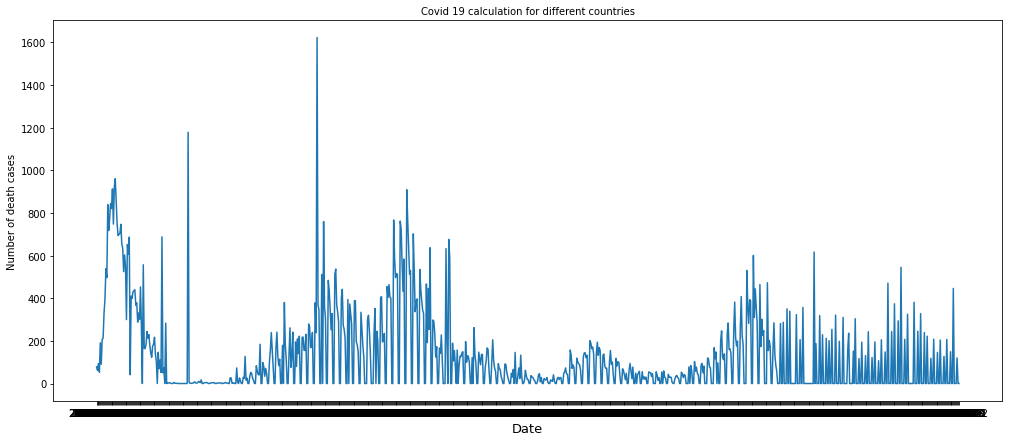

In [15]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

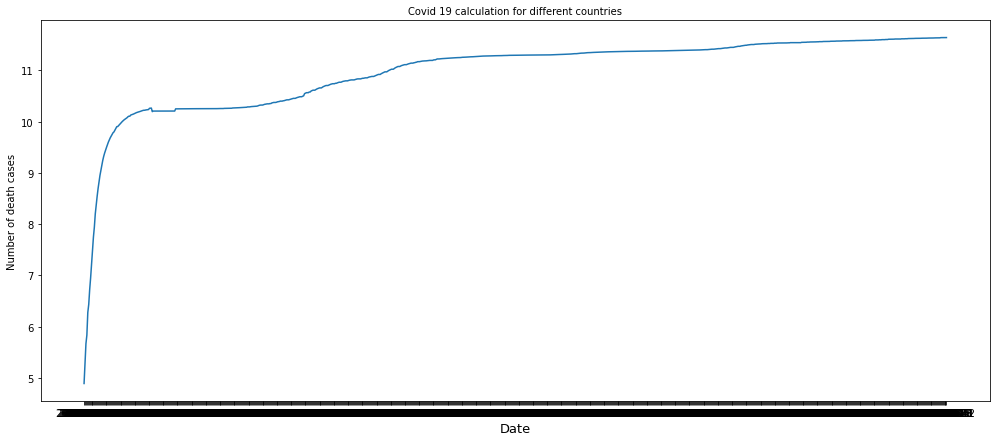

In [16]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,np.log(data_index['total_deaths']));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

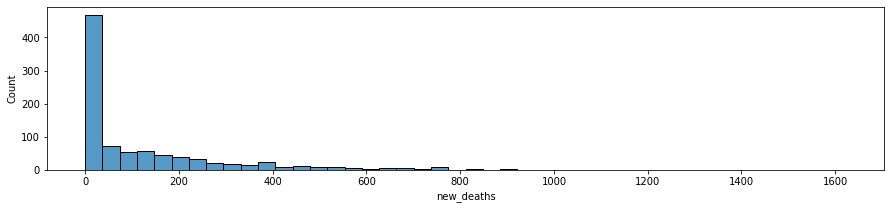

In [17]:

plt.figure(figsize=(15,3))
sns.histplot(data_index['new_deaths'])

# splitting of data into x and y

In [18]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

## scaling data

In [19]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# splitting data into train and test set

In [20]:
n = len(X)
X_train = X[0:int(n-15)]
X_test=X[int(n-15):]
y_train=y[0:int(n-15)]
y_test=y[int(n-15):]

# Model

In [21]:
model =SVR(C=5, coef0=10, epsilon=0.05, kernel='poly')

In [22]:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
best=grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.1s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=8, kernel=rbf; total time=   0.1s
[CV] END ...............C=5, coef0=0.5, degree=8, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=8,

In [ ]:
best

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

## fitting the model for train and test set

In [ ]:
model=best
best_model=model.fit(X_train,y_train)
best_model

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

In [ ]:
country='Spain'

In [ ]:
path='/home/sumedha/code/covid_time_series_prediction/covid_time_series_prediction/data/models'

In [ ]:
best_model

SVR(C=5, coef0=10, epsilon=0.05, kernel='poly')

In [ ]:
country

'Spain'

In [ ]:
with open(f'{path}/model_{country}.pkl','wb') as f:
    pickle.dump(best_model, f)

[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.1s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=8, kernel=poly; total time=   0.1s
[CV] END ...............C=5, coef0=10, degree=3, kernel=poly; total time=   0.0s
[CV] END ................C=5, coef0=10, degree=3, kernel=rbf; total time=   0.0s
[CV] END ...............C=5, coef0=10, degree=8, kernel=poly; total time= 1.5min
[CV] END ................C=6, coef0=10, degree=8, kernel=rbf; total time=   0.0s
[CV] END ................C=6, coef0=10, degree=8, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.1s
[CV] END ..............C=5, coef0=0.01, degree=8, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, 

In [ ]:
model_load=pickle.load(open(f'{path}/model_{country}.pkl','rb'))

In [ ]:
model_load

SVR(C=5, coef0=10, epsilon=0.05, kernel='poly')

## prediction

In [ ]:
y_pred=best_model.predict(X_test)

## evaluating model performance

In [ ]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.0033423114144974595

In [ ]:
y_pred.shape

(50,)

Text(0.5, 0, 'Date')

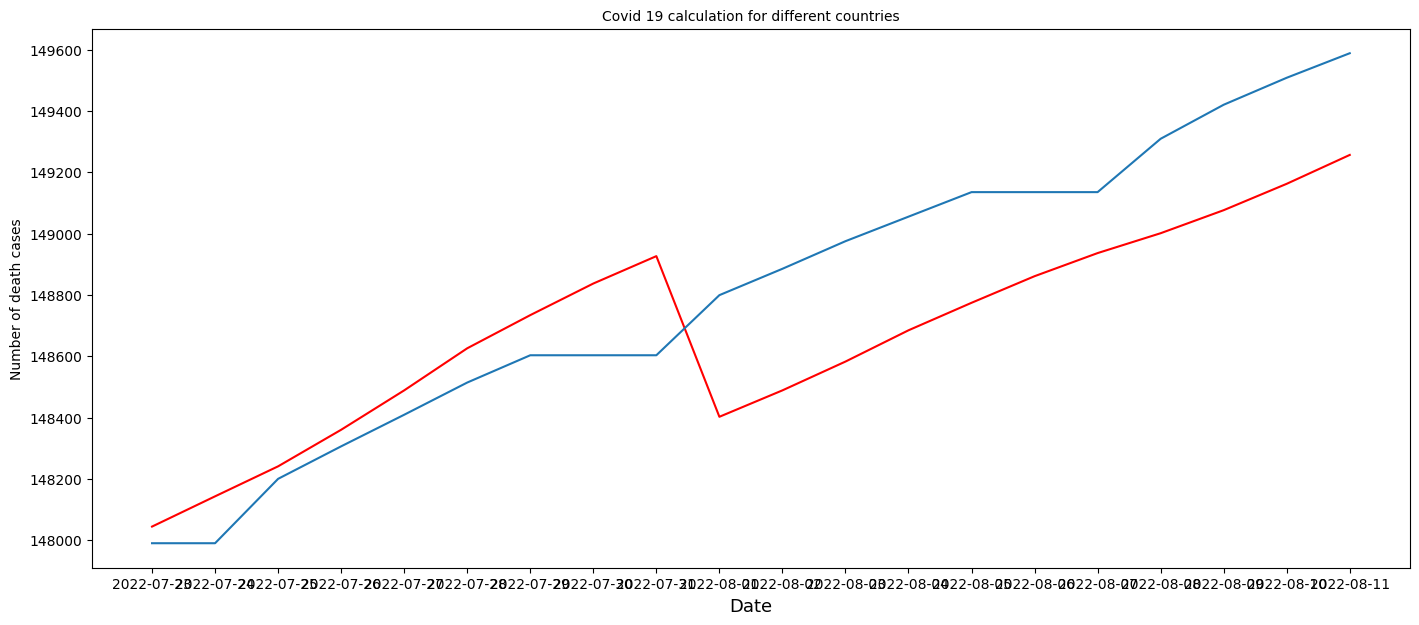

In [ ]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index[:20],y_pred[:20],color='r');
plt.plot(y_test.index[:20],y_test[:20]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)